# PRÉDICTION DE PRÉSENCE DE MALADIE CARDIAQUE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel("Dataset.xlsx")

In [4]:
df = data.copy()
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
quali_columns = df.select_dtypes("object").columns.tolist()
quali_columns.append('GAJ')
quali_columns

['SEXE', 'TDT', 'ECG', 'ANGINE', 'PENTE', 'GAJ']

In [9]:
quanti_columns = [col for col in df.columns if col not in quali_columns]
quanti_columns.remove('CŒUR')
quanti_columns

['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION']

## A) PREPROCESSING

In [109]:
X = df.drop('CŒUR', axis=1)
y = df['CŒUR']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"X_train: {X_train.shape}\t X_test: {X_test.shape}\ny_train: {y_train.shape}\t\t y_test: {y_test.shape}")

X_train: (642, 11)	 X_test: (276, 11)
y_train: (642,)		 y_test: (276,)


In [111]:
preprocessor= make_column_transformer((RobustScaler(), quanti_columns),
                                      (OneHotEncoder(), quali_columns))

## B) MODÉLISATION

In [112]:
model_1 = DecisionTreeClassifier(random_state=0)
model_2 = LogisticRegression(random_state=0)
model_3 = SVC(random_state=0)
model_4 = RandomForestClassifier(random_state=0)
model_5 = BaggingClassifier(base_estimator= KNeighborsClassifier(), random_state=0)
model_6 = AdaBoostClassifier(random_state=0)
model_7 = KNeighborsClassifier()

In [113]:
modelList = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]

### Encodage et normalisation (RobustScaler)

In [123]:
def model_evaluation(model_list):
    
    for item in model_list:
        model = make_pipeline(preprocessor, item)
        model.fit(X_train, y_train)
        
        print('=='*50)
        y_train_pred = model.predict(X_train)
        print(f"Évalution du modèle: {item}\n")
        print(classification_report(y_train, y_train_pred), "\n")
        
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                    cv=5, scoring = 'f1', 
                                                    train_sizes=np.linspace(0.1, 1, 10))
        plt.figure(figsize=(8,4))
        plt.title(f"Courbe train-test du modèle {item}")
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()        

Évalution du modèle: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       345

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642
 

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       113
           1       0.84      0.74      0.78       163

    accuracy                           0.76       276
   macro avg       0.76      0.77      0.76       276
weighted avg       0.77      0.76      0.76       276

Évalution du modèle: LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       297
           1       0.88      0.89      0.89       345

    accuracy                           0.88       642
   macro

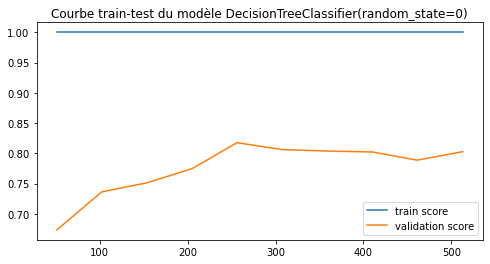

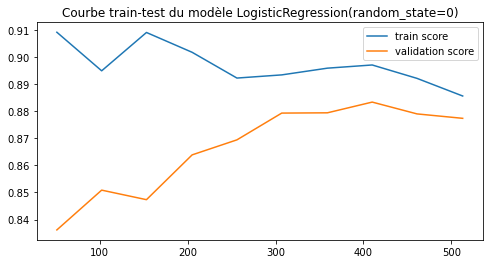

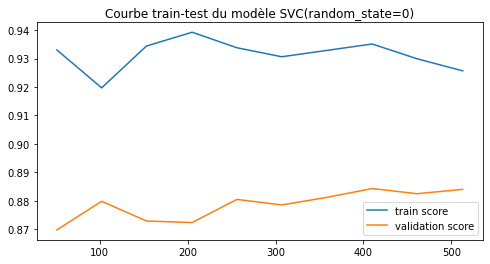

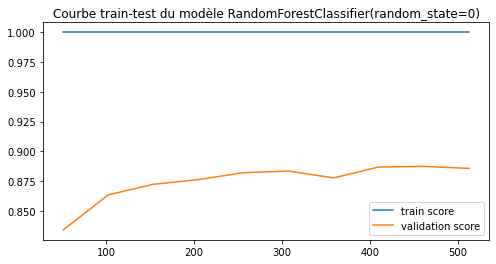

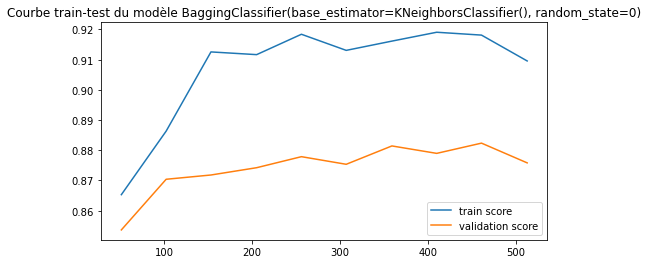

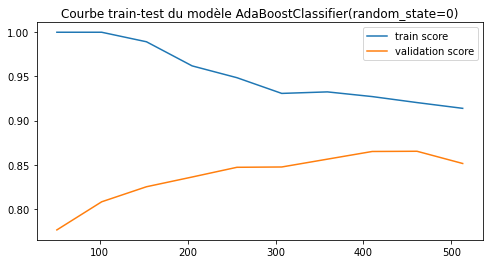

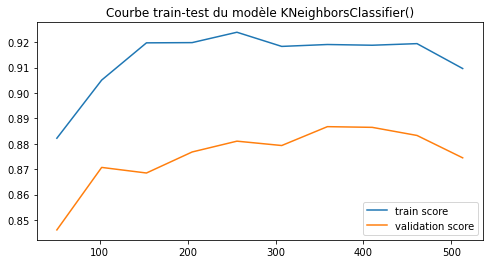

In [115]:
model_evaluation(modelList)

### COMMENTAIRES DU PREPROCESSING ET DE LA MODÉLISATION

**Encodage et normalisation (RobustScaler)**

- Les performances des mêmes algorithmes que précédement se sont légèrement améliorées

- les modèles basés sur les algorithmes de ***DecisionTreeClassifier***, ***RandomForestClassifier*** font du surapprentisage.
(*Les performances sur le jeu d'entraînement sont largement supérieures à celles sur les données test*)


- les modèles basés sur les algorithmes de ***Logistic Regression***, ***Support Vecteur Machine***(SVC), ***AdaBoostClassifier***, ***KNeighborsClassifier***, ***BaggingClassifier*** donnent plutôt des résultats très encourangeants au niveau de l'apprentissage mais pas suffisants pour statuer.

## AMÉLIORATION DES PERFORMANCES DES MODÈLES

### FEATURES ENGINEERING

**1ère approche: Suppression des outliers des outliers**

In [106]:
df_withoutOutliers =  df.copy()
q1 = df_withoutOutliers[quanti_columns].quantile(0.25)
q3 = df_withoutOutliers[quanti_columns].quantile(0.75)
iqr = q3 - q1
lowerLimit = q1 - 1.5*iqr
upperLimit = q3 + 1.5*iqr

In [107]:
for col in df_withoutOutliers[quanti_columns]:
    df_withoutOutliers = df_withoutOutliers.drop(df_withoutOutliers[(df_withoutOutliers[col] > upperLimit[col]) | (df8[col] < lowerLimit[col])].index)

In [116]:
df_withoutOutliers

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


En supprimant les outliers, nous passons d'un dataset de taille (918, 12) à (702, 12).
Maintenant, testons les mêmes modèles que précédemment.

Notation: On ajoutera le suffixe "_1" à toutes les variables au cours de cette étape pour différencier des variables précédentes.

In [117]:
X_1 = df_withoutOutliers.drop('CŒUR', axis=1)
y_1 = df_withoutOutliers['CŒUR']

In [120]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=0)
print(f"X_train_1: {X_train_1.shape}\t X_test_1: {X_test_1.shape}\ny_train_1: {y_train_1.shape}\t\t y_test_1: {y_test_1.shape}")

X_train_1: (491, 11)	 X_test_1: (211, 11)
y_train_1: (491,)		 y_test_1: (211,)


In [121]:
def model_evaluation_1(model_list):
    
    for item in model_list:
        model = make_pipeline(preprocessor, item)
        model.fit(X_train_1, y_train_1)
        
        print('=='*50)
        y_train_pred_1 = model.predict(X_train_1)
        print(f"Évalution du modèle: {item}\n")
        print(classification_report(y_train_1, y_train_pred_1), "\n")
        
        y_pred_1 = model.predict(X_test_1)
        print(classification_report(y_test_1, y_pred_1))
        
        N, train_score, val_score = learning_curve(model, X_train_1, y_train_1,
                                                    cv=5, scoring = 'f1', 
                                                    train_sizes=np.linspace(0.1, 1, 10))
        plt.figure(figsize=(8,4))
        plt.title(f"Courbe train-test du modèle {item}")
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()        

Évalution du modèle: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       224

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491
 

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       110
           1       0.80      0.70      0.75       101

    accuracy                           0.77       211
   macro avg       0.78      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211

Évalution du modèle: LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       267
           1       0.85      0.88      0.86       224

    accuracy                           0.87       491
   macro

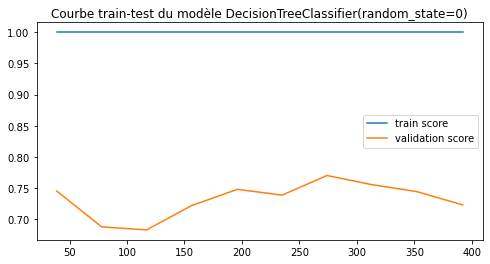

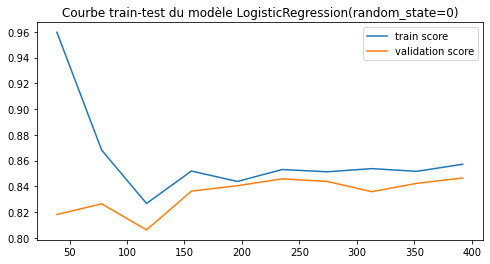

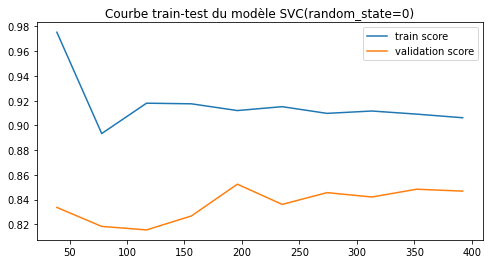

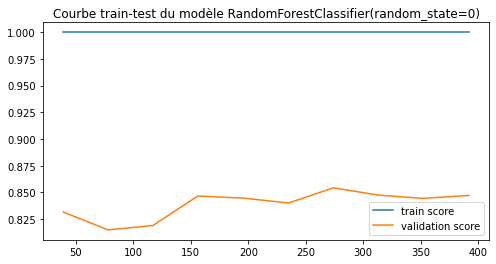

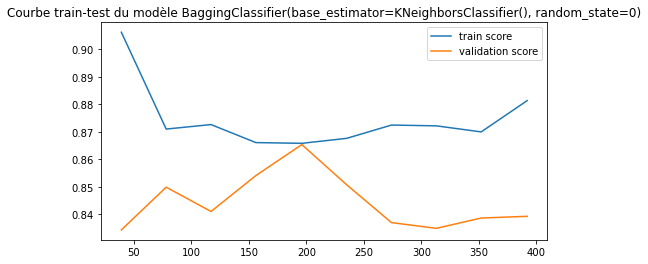

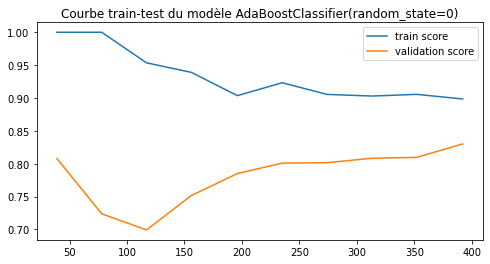

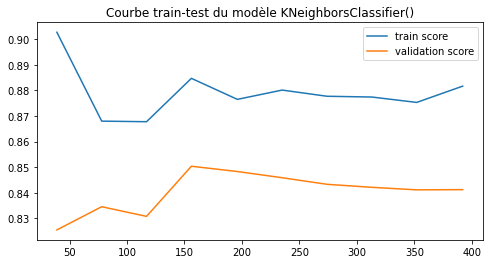

In [122]:
model_evaluation_1(modelList)

**1ère approche d'amélioration: feature engineering**

- Les modèles basés sur les algorithmes de ***KNeighborsClassifier*** et ***BaggingClassifier*** se sont améliorés très légèrement mais demeurent instables. Ils seront donc retirés lors de la prochaine approche.

- On remarque toujours que les modèles basés sur les algorithmes de ***DecisionTreeClassifier***, ***RandomForestClassifier*** font du surapprentisage. (*Les performances sur le jeu d'entraînement sont largement supérieures à celles sur les données test*). On les supprimera lors de la prochaine approche.

- Les performances des algorithmes ***Logistic Regression***, ***Support Vecteur Machine***(SVC), ***AdaBoostClassifier*** se sont nettement améliorées.